2021-03-30

# Global Functions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display
import re


np.random.seed(10086)
#from Sean's notebook
def check_data_balance(series, style="seaborn-pastel"):
  with plt.style.context(style):
    unique = series.value_counts()
    display(unique) #show unique value counts of the target
    plt.pie(unique, explode=[0.05]*len(unique), labels=unique.index, autopct='%1.1f%%'); #plot a pie chart for the target to see if data are balanced

from functools import wraps
import inspect
def initializer(func): #https://stackoverflow.com/questions/1389180/automatically-initialize-instance-variables
    names, varargs, keywords, defaults = inspect.getfullargspec(func)[:4]
    @wraps(func)
    def wrapper(self, *args, **kargs):
        for name, arg in list(zip(names[1:], args)) + list(kargs.items()):
            setattr(self, name, arg)

        for name, default in zip(reversed(names), reversed(defaults)):
            if not hasattr(self, name):
                setattr(self, name, default)

        func(self, *args, **kargs)
    return wrapper

# Load Data

In [ ]:
from google.colab import files
import pandas as pd
from google.colab import drive
#Method 1 for downloading Data
#1-a)
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Downloading...
From: https://drive.google.com/uc?id=1CLtos7Lpc82ufDrTtKtyC7dyUXeRztFm
To: /content/train.csv
198MB [00:03, 79.8MB/s]

In [ ]:
#Method 1-b)
df = pd.read_csv("/content/gdrive/MyDrive/DS-PROJECT/bank/train.csv")
df

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2

In [ ]:
#Method 2 
# in this method the data file has to be shared in a mannaer that everyone with the link has access
# otherwise it won't load, the benefit of this mothod is that you don't need to mount the drive
!gdown --id 1CLtos7Lpc82ufDrTtKtyC7dyUXeRztFm

# Data Exploration

## Check for missing data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


## Is it a balanced dataset?

0    179902
1     20098
Name: target, dtype: int64

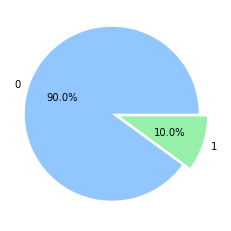

In [ ]:
check_data_balance(df["target"])

## Histograms

In [ ]:
_ = df.hist(figsize=(20,15))

# Machine Learning

## Choose X and y

In [ ]:
#define target and predictors
y = df['target']
X = df.drop(['target', 'ID_code'], axis=1)
print(f"TARGET: {y}")
print(f"columns_predictors: {X}")


TARGET: 0         0
1         0
2         0
3         0
4         0
         ..
199995    0
199996    0
199997    0
199998    0
199999    0
Name: target, Length: 200000, dtype: int64
columns_predictors:           var_0   var_1    var_2   var_3  ...  var_196  var_197  var_198  var_199
0        8.9255 -6.7863  11.9081  5.0930  ...   7.8784   8.5635  12.7803  -1.0914
1       11.5006 -4.1473  13.8588  5.3890  ...   8.1267   8.7889  18.3560   1.9518
2        8.6093 -2.7457  12.0805  7.8928  ...  -6.5213   8.2675  14.7222   0.3965
3       11.0604 -2.1518   8.9522  7.1957  ...  -2.9275  10.2922  17.9697  -8.9996
4        9.8369 -1.4834  12.8746  6.6375  ...   3.9267   9.5031  17.9974  -8.8104
...         ...     ...      ...     ...  ...      ...      ...      ...      ...
199995  11.4880 -0.4956   8.2622  3.5142  ...   2.1661   8.5326  16.6660 -17.8661
199996   4.9149 -2.4484  16.7052  6.6345  ...  -2.1651   6.7419  15.9054   0.3388
199997  11.2232 -5.0518  10.5127  5.6456  ...   1.2832   8.

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1364, stratify=y)
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (150000, 200)
X_test.shape: (50000, 200)
y_train.shape: (150000,)
y_test.shape: (50000,)


In [ ]:
display(X_train)
display(y_train)

0    134927
1     15073
Name: target, dtype: int64

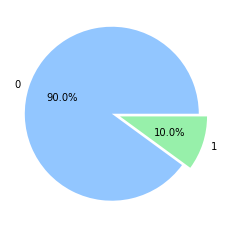

In [ ]:
check_data_balance(y_train)

0    44975
1     5025
Name: target, dtype: int64

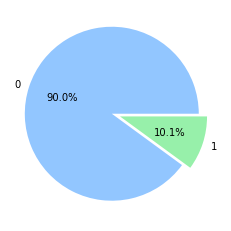

In [ ]:
check_data_balance(y_test)

## Preprocessing with pipelines 🚀

##### Notes about class creation

In [ ]:
from sklearn.pipeline import Pipeline #each pipeline can have multiple steps
from sklearn.base import BaseEstimator, TransformerMixin #classes to inherit from when building custom transformers
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures #specific transformations we want to use in our pipelines

class CustomScaler(BaseEstimator, TransformerMixin):
  def __init__(self, **kwargs):
    self.scaler = MinMaxScaler(**kwargs)
  def fit(self, X, y=None):
    self.scaler.fit(X)
    return self
  def transform(self, X, y=None):
    return pd.DataFrame(self.scaler.transform(X), columns=X.columns, index=X.index)

#scaler = MinMaxSclaer() #creating an instance of the MinMaxScaler class
#selector = ExtraTreeSelector(200)

from sklearn.feature_selection import SelectFromModel

#Below is an ExtraTree and feature importance extractor without sampling the data
from sklearn.ensemble import ExtraTreesClassifier
class ExtraTreeSelector(BaseEstimator, TransformerMixin):
  def __init__(self, n_estimators=5, top_percent=0.3):
    self.n_estimators = n_estimators
    self.top_percent = top_percent
  def fit(self, X, y):
    self.Etree = ExtraTreesClassifier(n_estimators=self.n_estimators)
    self.Etree.fit(X,y)
    return self
  def transform(self,X, y=None):
#if you want to have access to the class attribute use self
    self.var_importance = pd.DataFrame({'feature_name':X.columns,'importance':self.Etree.feature_importances_})
    #print(self.var_importance)
    self.var_importance = self.var_importance.sort_values('importance', ascending= False)
    #print(self.var_importance)
    self.top30_var_importance = self.var_importance[:int(len(self.var_importance)*self.top_percent)]
    return X[self.top30_var_importance['feature_name']]


#Define an extra tree then define a sampling technique that uses portion of the data to train the model
#then get the feature importance from the Extra tree after that define the threshold for the important features to be used in your next model
# top 30 percent, 50 percent or 70 percent of the important features will be extracted (to fit into the logistic regression)
class ExtraTreeII(BaseEstimator, TransformerMixin):
  def __init__(self, n_estimators=500, top_percent=0.3, frac= 0.1, max_depth =10):
    self.n_estimators = n_estimators
    self.top_percent = top_percent
    self.frac = frac
    self.max_depth = max_depth
  def fit(self, X, y):
    self.Etree = ExtraTreesClassifier(n_estimators=self.n_estimators, n_jobs = -1, random_state =10068)
    self.Etree.fit(X.sample(frac=self.frac, random_state=10086), y.sample(frac=self.frac, random_state=10086))
    return self
  def transform(self,X, y=None):
#if you want to have access to the class attribute use self
    self.var_importance = pd.DataFrame({'feature_name':X.columns,'importance':self.Etree.feature_importances_})
    #print(self.var_importance)
    self.var_importance = self.var_importance.sort_values('importance', ascending= False)
    #print(self.var_importance)
    self.top30_var_importance = self.var_importance[:int(len(self.var_importance)*self.top_percent)]
    return X[self.top30_var_importance['feature_name']]

class CustomPolynomial(BaseEstimator, TransformerMixin):
  @initializer
  def __init__(self, degree=2, interaction_only=False, include_bias=False, avoid_onehot_nonsense=False, onehot_dtype="bool", **kwargs):
    self.poly = PolynomialFeatures(degree=degree, interaction_only=interaction_only, include_bias=include_bias, **kwargs)
  def fit(self, X, y=None):
    self.poly.fit(X)
    return self
  def transform(self, X, y=None):
    df_poly = pd.DataFrame(data=self.poly.transform(X), columns=self.poly.get_feature_names(X.columns), index=X.index)
    if self.avoid_onehot_nonsense: #one-hot dummy variables squared are still the same values, so discard those
      df_poly.drop(df_poly.filter(regex="({})\^\d+$".format("|".join(X.select_dtypes(self.onehot_dtype).columns))).columns, axis=1, inplace=True)
    return pd.concat([X, df_poly[[col for col in df_poly.columns if col not in X.columns]]], axis=1)

pipeline_full = Pipeline([
  
  ("scaler", CustomScaler(feature_range=(0,1))),
  #you can put the poly here if your RAM can support it
  ("select", ExtraTreeII(top_percent=0.7,frac=0.2, max_depth=30)),
  

])

### Apply the pipeline



In [ ]:
%time
pipeline_full.fit(X_train, y_train)
X_train_transformed = pipeline_full.transform(X_train)
X_test_transformed = pipeline_full.transform(X_test)
print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs
X_train_transformed.shape: (150000, 140)
X_test_transformed.shape: (50000, 140)


In [ ]:
##IF you have RAM to run the poly you can try the below before feeding it into the logistic Regression or 

In [ ]:
# this one crashed my note book, so don't run the next few on Poly

poly =  CustomPolynomial(avoid_onehot_nonsense=True)
poly
poly.fit(X_train_transformed,y_train)

CustomPolynomial(avoid_onehot_nonsense=True, degree=2, include_bias=False,
                 interaction_only=False, onehot_dtype='bool')

In [ ]:
#my system crashed on this part but you can try on a computer with higher RAM
%time
X_train_poly_trans = poly.transform(X_train_transformed)
X_test_poly_trans = poly.transform(X_test_transformed)
print(f"X_train_poly_trans.shape: {X_train_poly_trans.shape}")
print(f"X_test_poly_trans.shape: {X_test_poly_trans.shape}")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 9.54 µs


NameError: ignored



```

```

## Train an Logistic Regression model on the transformed training set (important features of Extra Tree)

In [ ]:
%%time
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV(n_jobs=-1, random_state=10086, cv=3, max_iter=200)
model.fit(X_train_transformed, y_train)

CPU times: user 1.46 s, sys: 397 ms, total: 1.86 s
Wall time: 29.2 s


## Evaluate the model on the transformed testing set

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = model.predict(X_test_transformed)
y_pred_proba = model.predict_proba(X_test_transformed) #to calculate ROC_AUC, we need model.predict_proba() instead of model.pred()

print(f"accuracy_score: {accuracy_score(y_test, y_pred)}")
print(f"precision_score: {precision_score(y_test, y_pred)}")
print(f"recall_score: {recall_score(y_test, y_pred)}")
print(f"f1_score: {f1_score(y_test, y_pred)}")
print(f"roc_auc_score: {roc_auc_score(y_test, y_pred_proba[:,1])}")

accuracy_score: 0.91196
precision_score: 0.6718146718146718
recall_score: 0.24238805970149255
f1_score: 0.3562445159403334
roc_auc_score: 0.8516012444724681


#Predict for the unseen data


In [ ]:
df_pred = pd.read_csv("/content/gdrive/MyDrive/DS-PROJECT/bank/test.csv")
df_pred

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,...,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,...,30.9641,5.6723,3.6873,13.0429,-10.6572,15.5134,3.2185,9.0535,7.0535,5.3924,-0.7720,-8.1783,29.9227,-5.6274,10.5018,9.6083,-0.4935,8.1696,-4.3605,5.2110,0.4087,12.0030,-10.3812,5.8496,25.1958,-8.8468,11.8263,-8.7112,15.9072,0.9812,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,-4.7057,-3.0422,13.6751,3.8183,10.8535,14.2126,9.8837,2.6541,21.2181,20.8163,12.4666,12.3696,4.7473,2.7936,5.2189,13.5670,-15.4246,-0.1655,7.2633,3.4310,-9.1508,9.7320,3.1062,22.3076,11.9593,9.9255,4.0702,4.9934,8.0667,...,39.3654,5.5228,3.3159,4.3324,-0.5382,13.3009,3.1243,-4.1731,1.2330,6.1513,-0.0391,1.4950,16.8874,-2.9787,27.4035,15.8819,-10.9660,15.6415,-9.4056,4.4611,-3.0835,8.5549,-2.8517,13.4770,24.4721,-3.4824,4.9178,-2.0720,11.5390,1.1821,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,0.0095,-5.0659,14.0526,13.5010,8.7660,14.7352,10.0383,-15.3508,2.1273,21.4797,14.5372,12.5527,2.9707,4.2398,13.7796,14.1408,1.0061,-1.3479,5.2570,6.5911,6.2161,9.5540,2.3628,10.2124,10.8047,-2.5588,6.0720,3.2613,16.5632,...,19.7251,5.3882,3.6775,7.4753,-11.0780,24.8712,2.6415,2.2673,7.2788,5.6406,7.2048,3.4504,2.4130,11.1674,14.5499,10.6151,-5.7922,13.9407,7.1078,1.1019,9.4590,9.8243,5.9917,5.1634,8.1154,3.6638,3.3102,-19.7819,13.4499,1.3104,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,5.1025,-3.2827,14.1013,8.9672,4.7276,14.5811,11.8615,3.1480,18.0126,13.8006,1.6026,16.3059,6.7954,3.6015,13.6569,13.8807,8.6228,-2.2654,5.2255,7.0165,-15.6961,10.6239,-4.7674,17.5447,11.8668,3.0154,4.2546,6.7601,5.9613,...,22.8700,5.6688,6.1159,13.2433,-11.9785,26.2040,3.2348,-5.5775,5.7036,6.1717,-1.6039,-2.4866,17.2728,2.3640,14.0037,12.9165,-12.0311,10.1161,-8.7562,6.0889,-1.3620,10.3559,-7.4915,9.4588,3.9829,5.8580,8.3635,-24.8254,11.4928,1.6321,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,test_199995,13.



#### Define unseen X

In [ ]:
X_unseen = df_pred.drop(['ID_code'], axis=1)
X_unseen

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,8.7625,...,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,-1.5536,...,30.9641,5.6723,3.6873,13.0429,-10.6572,15.5134,3.2185,9.0535,7.0535,5.3924,-0.7720,-8.1783,29.9227,-5.6274,10.5018,9.6083,-0.4935,8.1696,-4.3605,5.2110,0.4087,12.0030,-10.3812,5.8496,25.1958,-8.8468,11.8263,-8.7112,15.9072,0.9812,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,-4.7057,-3.0422,13.6751,3.8183,10.8535,14.2126,9.8837,2.6541,21.2181,20.8163,12.4666,12.3696,4.7473,2.7936,5.2189,13.5670,-15.4246,-0.1655,7.2633,3.4310,-9.1508,9.7320,3.1062,22.3076,11.9593,9.9255,4.0702,4.9934,8.0667,0.8804,...,39.3654,5.5228,3.3159,4.3324,-0.5382,13.3009,3.1243,-4.1731,1.2330,6.1513,-0.0391,1.4950,16.8874,-2.9787,27.4035,15.8819,-10.9660,15.6415,-9.4056,4.4611,-3.0835,8.5549,-2.8517,13.4770,24.4721,-3.4824,4.9178,-2.0720,11.5390,1.1821,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,0.0095,-5.0659,14.0526,13.5010,8.7660,14.7352,10.0383,-15.3508,2.1273,21.4797,14.5372,12.5527,2.9707,4.2398,13.7796,14.1408,1.0061,-1.3479,5.2570,6.5911,6.2161,9.5540,2.3628,10.2124,10.8047,-2.5588,6.0720,3.2613,16.5632,8.8336,...,19.7251,5.3882,3.6775,7.4753,-11.0780,24.8712,2.6415,2.2673,7.2788,5.6406,7.2048,3.4504,2.4130,11.1674,14.5499,10.6151,-5.7922,13.9407,7.1078,1.1019,9.4590,9.8243,5.9917,5.1634,8.1154,3.6638,3.3102,-19.7819,13.4499,1.3104,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,5.1025,-3.2827,14.1013,8.9672,4.7276,14.5811,11.8615,3.1480,18.0126,13.8006,1.6026,16.3059,6.7954,3.6015,13.6569,13.8807,8.6228,-2.2654,5.2255,7.0165,-15.6961,10.6239,-4.7674,17.5447,11.8668,3.0154,4.2546,6.7601,5.9613,0.3695,...,22.8700,5.6688,6.1159,13.2433,-11.9785,26.2040,3.2348,-5.5775,5.7036,6.1717,-1.6039,-2.4866,17.2728,2.3640,14.0037,12.9165,-12.0311,10.1161,-8.7562,6.0889,-1.3620,10.3559,-7.4915,9.4588,3.9829,5.8580,8.3635,-24.8254,11.4928,1.6321,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,13.1678,1.0136,

###Transform the unseen data

In [ ]:
X_unseen_transformed = pipeline_full.transform(X_unseen)
X_unseen_transformed

,var_0,var_1,var_2,var_5,var_6,var_9,var_12,var_13,var_18,var_21,var_22,var_26,var_32,var_33,var_34,var_35,var_36,var_40,var_43,var_44,var_48,var_49,var_51,var_52,var_53,var_56,var_67,var_71,var_75,var_76,var_78,var_80,var_81,var_83,var_86,var_87,var_88,var_89,var_91,var_92,...,var_130,var_131,var_132,var_133,var_135,var_137,var_139,var_141,var_145,var_146,var_147,var_148,var_149,var_151,var_154,var_155,var_157,var_162,var_163,var_164,var_165,var_166,var_167,var_169,var_170,var_172,var_173,var_174,var_177,var_179,var_180,var_184,var_188,var_190,var_191,var_192,var_195,var_196,var_197,var_198
0,0.535360,0.897837,0.628717,0.590428,0.574061,0.674016,0.412658,0.224288,0.500738,0.488649,0.347060,0.369578,0.700669,0.394125,0.436918,0.654323,0.359617,0.376481,0.613859,0.528090,0.519909,0.510609,0.528447,0.495724,0.837701,0.628672,0.628244,0.571190,0.618640,0.516486,0.374934,0.567416,0.599483,0.659442,0.447038,0.690740,0.742103,0.698963,0.580345,0.580056,...,0.543261,0.595882,0.805201,0.730694,0.585268,0.508499,0.327700,0.347410,0.465153,0.562317,0.348778,0.542574,0.518613,0.522682,0.864667,0.592801,0.525007,0.337188,0.359852,0.339293,0.579883,0.296260,0.623377,0.306153,0.600754,0.631125,0.750340,0.453933,0.336894,0.476357,0.467058,0.792989,0.355245,0.366928,0.749230,0.195180,0.810571,0.570992,0.803003,0.463751
1,0.408005,0.641132,0.533050,0.556397,0.601977,0.279021,0.535546,0.302647,0.759844,0.223696,0.531220,0.476199,0.508464,0.486939,0.236019,0.449518,0.664165,0.869864,0.577520,0.274558,0.379784,0.422674,0.725559,0.656153,0.738013,0.719960,0.603056,0.514060,0.523726,0.509906,0.622204,0.412609,0.415164,0.658394,0.534352,0.433025,0.425608,0.486676,0.685130,0.584196,...,0.267988,0.449017,0.721399,0.586413,0.755353,0.271300,0.490519,0.784729,0.130909,0.416644,0.529627,0.558241,0.311050,0.500578,0.507955,0.601784,0.751870,0.322164,0.574094,0.274060,0.354442,0.577115,0.786482,0.381570,0.439658,0.644168,0.411529,0.289998,0.205665,0.613341,0.619498,0.695041,0.461309,0.759502,0.593904,0.389199,0.601884,0.391146,0.659828,0.648642
2,0.254905,0.184314,0.465517,0.844650,0.417628,0.609142,0.160106,0.346807,0.608299,0.379796,0.505588,0.220914,0.766636,0.738486,0.617246,0.704589,0.544535,0.310080,0.792899,0.414542,0.409507,0.331915,0.461703,0.600740,0.485822,0.650202,0.566177,0.366390,0.478182,0.212828,0.719645,0.705110,0.433774,0.457864,0.285508,0.553826,0.375151,0.177694,0.514209,0.481759,...,0.574319,0.541927,0.509932,0.418910,0.839045,0.306770,0.266532,0.435327,0.336142,0.562097,0.898163,0.653787,0.622999,0.707674,0.491752,0.507857,0.869644,0.283116,0.318628,0.596576,0.287397,0.537354,0.555433,0.658198,0.463120,0.441226,0.475194,0.653146,0.683273,0.578142,0.511833,0.683527,0.286006,0.410181,0.705125,0.474327,0.775034,0.218283,0.185794,0.687383
3,0.408357,0.539775,0.574667,0.706316,0.424956,0.485690,0.483835,0.688437,0.244056,0.382893,0.416388,0.632524,0.719505,0.301538,0.284595,0.351901,0.634139,0.584087,0.399313,0.376822,0.703685,0.285330,0.295404,0.514037,0.612771,0.480657,0.553436,0.358873,0.362742,0.609983,0.556177,0.734480,0.505021,0.737634,0.392476,0.597638,0.594576,0.395766,0.408804,0.391446,...,0.566159,0.558832,0.195990,0.484609,0.508346,0.415220,0.596172,0.729834,0.415107,0.413240,0.608411,0.349234,0.277542,0.518425,0.420930,0.338059,0.554116,0.321134,0.410805,0.260649,0.638009,0.333573,0.667937,0.472042,0.695015,0.215879,0.815211,0.376975,0.574557,0.420469,0.898522,0.423290,0.362694,0.727342,0.606357,0.447945,0.883857,0.558429,0.551527,0.339614
4,0.567520,0.586569,0.696941,0.460992,0.739656,0.441944,0.525598,0.528473,0.547140,0.446363,0.608420,0.823331,0.267460,0.566423,0.590596,0.509375,0.552789,0.399440,0.716733,0.654948,0.311626,0.440997,0.348500,0.612942,0.491805,0.376140,0.673192,0.709282,0.290774,0.531561,0.605634,0.615335,0.590484,0.457754,0.487585,0.256668,0.139945,0.439668,0.514519,0.742252,...,0.562786,0.455658,0.449963,0.604821,0.283936,0.616164,0.578830,0.310144,0.273951,0.624956,0.704699,0.621118,0.706229,0.397475,0.370

###Predict the targert based on the unseen data

In [ ]:
y_pred = model.predict_proba(X_unseen_transformed)
y_pred

array([[0.86665392, 0.13334608],
       [0.67477975, 0.32522025],
       [0.9643814 , 0.0356186 ],
       ...,
       [0.99771788, 0.00228212],
       [0.96408217, 0.03591783],
       [0.82688575, 0.17311425]])

In [ ]:
 my_df = pd.DataFrame(y_pred)
 my_df = pd.DataFrame pd.DataFrame({'feature_name': X.columns, 'importance':selector.Etree.feature_importances_})

,0,1
0,0.866654,0.133346
1,0.674780,0.325220
2,0.964381,0.035619
3,0.869706,0.130294
4,0.935721,0.064279
...,...,...
199995,0.983507,0.016493
199996,0.968064,0.031936
199997,0.997718,0.002282
199998,0.964082,0.035918


####Create a csv file as per the competition instructions




In [ ]:
 import pandas as pd
 my_df = pd.DataFrame(y_pred)
 my_df2 = pd.DataFrame({'ID': range(200000),'code': "test_"})
 my_df3= pd.DataFrame({'ID_code': my_df2['code'] + my_df2['ID'].astype(str),"target":my_df[1]})
 my_df3
 my_df3.to_csv('Data.csv', index=False)